Este colab fue desarrollado por Arnold Charry Armero.

# Giapetto’s problem

Giapetto's Woodcarving, Inc., fabrica dos tipos de juguetes de madera: soldados y trenes.
Un soldado vende por $\$ 27$ y usa $\$ 10$ en materias primas. Cada soldado que se fabrica aumenta los costos variables de mano de obra y generales de Giapetto en $\$ 14$. Un tren se vende por
$\$ 21$ y utiliza $\$ 9$ en materias primas. Cada tren construido aumenta los costos variables de mano de obra y gastos generales de Giapetto en $\$10$. La fabricación de soldados y trenes de madera requiere
dos tipos de mano de obra calificada: carpintería y acabados. Un soldado requiere 2 horas de acabado.
mano de obra y 1 hora de mano de obra de carpintería. Un tren requiere 1 hora de acabado y 1 hora de trabajo de carpintería. Cada semana, Giapetto puede obtener toda la materia prima necesaria pero sólo 100 horas de acabado y 80 horas de carpintería. La demanda de trenes es ilimitada, pero cada semana se compran como máximo 40 soldados. Giapetto quiere maximizar las ganancias semanales (costos de ingresos).
Formule un modelo matemático de la situación de Giapetto que pueda usarse para maximizar las ganancias semanales de Giapetto.

## Conjuntos

$ i = \text{Tipo de producto }i$

## Parámetros

$ HC = \textrm{Número de horas totales de trabajo de carpintería} $

$ HA = \textrm{Número de horas totales de trabajo de acabados} $

$ HCC_{i} = \textrm{Horas requeridas para el producto tipo }i \textrm{ en carpintería }$

$ HCA_{i} = \textrm{Horas requeridas para el producto tipo }i \textrm{ en acabados }$

$ S = \textrm{Producción máxima de soldados }  $

$ I_{i} = \textrm{Ingreso que genera vender el producto tipo }  i$

$ CH_{i} = \textrm{Costos variables de mano de obra de producto tipo }  i$

$ CP_{i} = \textrm{Costo de producir el producto tipo }  i$

## Variables de decisión

$ x_{i} = \textrm{Cantidad de producto } i \textrm{ producido }$

## Función objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i} \: x_{i} - CH_{I}\: x_{i} - CP_{i}\: x_{i}$$

No se puede rebasar el número de horas de trabajo de carpintería,

$$ \sum_{i = 1}^{n} HCC_{i} \: x_{i} \leq HC $$

No se puede rebasar el número de horas de trabajo en acabados,

$$ \sum_{i = 1}^{n} HCA_{i} \: x_{i} \leq HA $$

Se pueden producir como máximo 40 soldados,

$$ x_{1} \leq S $$

No pueden haber variables negativas,

$$ x_{i} \geq 0 $$

Como versión simplificada, se obtienen los siguientes resultados matemáticos,

$$ \textrm{Max } z = 3x_{1} + 2x_{2} $$

$ \textrm{s.a.} $

$$ 2x_{1} + x_{2} \leq 100 $$

$$ x_{1} + x_{2} \leq 80 $$

$$ x_{1} \leq 40 $$

$$ x_{1} \geq 0 $$

$$ x_{2} \geq 0 $$


In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 28.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [4]:
model = LpProblem(name = "Giapetto's_Problem", sense = LpMaximize)

#Inicialización de las variables de decisión
X1 = LpVariable('X1', 0, None, LpInteger)
X2 = LpVariable('X2', 0, None, LpInteger)

model += 3 * X1 + 2 * X2, "Función Objetivo"

model += 2 * X1 + X2 <= 100
model += X1 + X2 <= 80
model += X1 <= 40

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

print("Función Objetivo =", value(model.objective))

Status Optimal
X1 = 20.0
X2 = 60.0
Función Objetivo = 180.0


<function matplotlib.pyplot.show(close=None, block=None)>

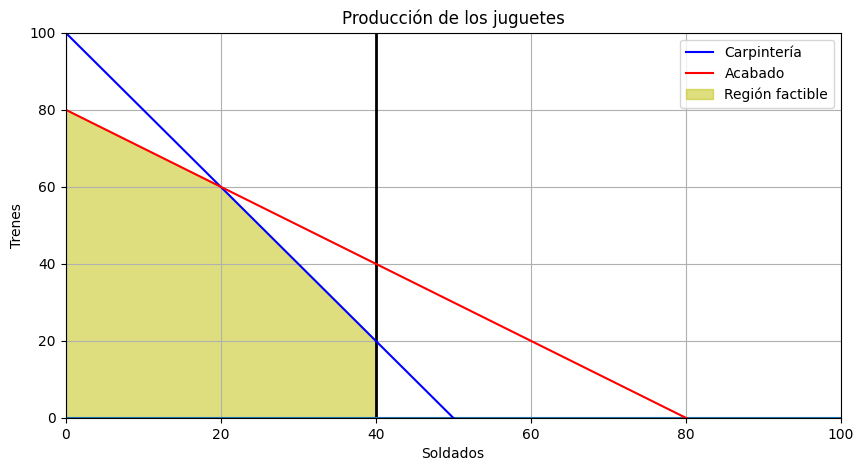

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
y1 = 100 - 2 * x
y2 = 80 - x
plt.axvline(x=40, color='k', linestyle='-', linewidth=2)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.hlines(0, xmin=0, xmax=100)
plt.vlines(0, ymin=0, ymax=100)
plt.grid(True)

plt.xlabel('Soldados')
plt.ylabel('Trenes')
plt.title('Producción de los juguetes')

plt.plot(x, y1, label='Carpintería', color = 'b')
plt.plot(x, y2, label='Acabado', color = 'r')

x = [0, 0, 20, 40, 40]
y = [0, 80, 60, 20, 0]
plt.fill(x, y, color = 'y', alpha = 0.5, label='Región factible')
plt.legend()
plt.show